# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import random

from scipy.stats import linregress

from config import api_key
from citipy import citipy

## Generate Cities List

In [3]:
#Create the lists to hold the data

cities_raw = []

#create random latitude and longitude values and combine them into a single DataFrame
#doing more than 500 because of duplicates (i tried doing 1500 and got a lot of dupes)
#tried pd.concat for lat_long and couldn't get it to work, found zip() and hope it works
lats = [random.randrange(-90,90) for i in range(2000)]
lngs = [random.randrange(-90,90) for i in range(2000)]
lat_lngs = zip(lats, lngs)

for coord in lat_lngs:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    cities_raw.append(city)

#need to remove the duplicate cities, I think I could have done this up front, but I was having trouble getting it to run
cities_unique = []
[cities_unique.append(x) for x in cities_raw if x not in cities_unique]
cities_unique

['pentecoste',
 'saldanha',
 'regen',
 'paamiut',
 'ushuaia',
 'kruisfontein',
 'belyy yar',
 'sorvag',
 'cape town',
 'hermanus',
 'silvan',
 'souillac',
 'ponta do sol',
 'bredasdorp',
 'dubenskiy',
 'karachev',
 'ribeira grande',
 'pisco',
 'dhidhdhoo',
 'east london',
 'riyadh',
 'curaca',
 'hanover',
 'chepo',
 'senno',
 'yarmouth',
 'nyamuswa',
 'narsaq',
 'jamestown',
 'andenes',
 'kavaratti',
 'mehamn',
 'tasiilaq',
 'mahebourg',
 'illoqqortoormiut',
 'rennes',
 'ilulissat',
 'salisbury',
 'grand gaube',
 'sao felix do xingu',
 'barentsburg',
 'georgetown',
 'mar del plata',
 'chicama',
 'nuuk',
 'belushya guba',
 'sao joao da barra',
 'arraial do cabo',
 'marzuq',
 'victoria',
 'hofn',
 'oyotun',
 'lagoa',
 'taolanaro',
 'tibati',
 'punta arenas',
 'pervouralsk',
 'bambous virieux',
 'clyde river',
 'hattiesburg',
 'codrington',
 'dallas',
 'cidreira',
 'klaksvik',
 'port alfred',
 'kamenka',
 'menzelinsk',
 'longyearbyen',
 'bathsheba',
 'dingle',
 'bjala',
 'marcona',
 'plat

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#set my request stuff (taken from previous class activities)
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = weather_url + "appid=" + api_key + "&units=" + units + "&q="

#set up my containers to add the data that it finds (if the city can be found)
city_builder = []
latitude = []
longitude = []
country = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []

#thought it might be fun to see which cities it can't find, don't know if i'll do something with this or not
lonely_city = []

#per the instructions, I need to have a record processing count and print out the record as it processes?
record_counter = 0


#OpenWeatherMap url + api key & modifications needed for call
for city in cities_unique:
    
    getter = f"{query_url}{city}"

    response=requests.get(getter).json()
    
    try:
        city_builder.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        
        record_counter += 1
        
        print(f"Record {record_counter}: {city} being processed")
    except:
        record_counter += 1
        lonely_city.append({city})
        print(f"Record {record_counter}: {city} could not be located, skipped for processing")
        pass

Record 1: pentecoste being processed
Record 2: saldanha being processed
Record 3: regen being processed
Record 4: paamiut being processed
Record 5: ushuaia being processed
Record 6: kruisfontein being processed
Record 7: belyy yar being processed
Record 8: sorvag could not be located, skipped for processing
Record 9: cape town being processed
Record 10: hermanus being processed
Record 11: silvan being processed
Record 12: souillac being processed
Record 13: ponta do sol being processed
Record 14: bredasdorp being processed
Record 15: dubenskiy could not be located, skipped for processing
Record 16: karachev being processed
Record 17: ribeira grande being processed
Record 18: pisco being processed
Record 19: dhidhdhoo being processed
Record 20: east london being processed
Record 21: riyadh being processed
Record 22: curaca being processed
Record 23: hanover being processed
Record 24: chepo being processed
Record 25: senno being processed
Record 26: yarmouth being processed
Record 27: ny

Record 211: itupiranga being processed
Record 212: castro being processed
Record 213: hamilton being processed
Record 214: tabuk being processed
Record 215: oktyabrskoye being processed
Record 216: glyadyanskoye being processed
Record 217: tombouctou being processed
Record 218: saint-philippe being processed
Record 219: kindu being processed
Record 220: araxa being processed
Record 221: sorland being processed
Record 222: ibicui being processed
Record 223: caraz being processed
Record 224: bengkulu being processed
Record 225: begun being processed
Record 226: brokopondo being processed
Record 227: muriti being processed
Record 228: kuche could not be located, skipped for processing
Record 229: zelenogorskiy being processed
Record 230: aripuana being processed
Record 231: goba being processed
Record 232: kamina being processed
Record 233: salalah being processed
Record 234: nantucket being processed
Record 235: sahrak could not be located, skipped for processing
Record 236: hare bay bei

Record 421: santa cruz de la palma being processed
Record 422: yendi being processed
Record 423: hambantota being processed
Record 424: tuggurt could not be located, skipped for processing
Record 425: artvin being processed
Record 426: ulcinj being processed
Record 427: raipur being processed
Record 428: navrongo being processed
Record 429: moron being processed
Record 430: azimur could not be located, skipped for processing
Record 431: la tuque being processed
Record 432: kidal being processed
Record 433: bijar being processed
Record 434: burgeo being processed
Record 435: eyl being processed
Record 436: hagersville being processed
Record 437: borba being processed
Record 438: thompson being processed
Record 439: cockburn town being processed
Record 440: pucallpa being processed
Record 441: rocha being processed
Record 442: saint simons being processed
Record 443: caconda being processed
Record 444: jalu being processed
Record 445: farafangana being processed
Record 446: ajdabiya bein

Record 629: inta being processed
Record 630: visnes being processed
Record 631: sarkand being processed
Record 632: wladyslawowo being processed
Record 633: crossville being processed
Record 634: batticaloa being processed
Record 635: stilling being processed
Record 636: staryy saltiv being processed
Record 637: ostersund being processed
Record 638: gibara being processed
Record 639: barnstaple being processed
Record 640: norton shores being processed
Record 641: pionerskiy being processed
Record 642: ostrovnoy being processed
Record 643: bondo being processed
Record 644: filingue being processed
Record 645: malwan could not be located, skipped for processing
Record 646: aasiaat being processed
Record 647: dodola being processed
Record 648: ashtabula being processed
Record 649: spartanburg being processed
Record 650: olafsvik being processed
Record 651: marsh harbour being processed
Record 652: volovo being processed
Record 653: una being processed
Record 654: port blair being processe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create df
city_results_df = pd.DataFrame({'City': city_builder,
                       'Country': country,
                       'Lat': latitude,
                       'Lng': longitude,
                       'Max Temp': max_temp,
                       'Humidity': humidity,
                       'Cloudiness': cloudiness,
                       'Wind Speed': wind_speed,
                       'Date': date})
city_results_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Pentecoste,BR,-3.7928,-39.2703,79.68,57,10,6.31,1627865354
1,Saldanha,ZA,-33.0117,17.9442,48.25,87,40,8.16,1627865354
2,Regen,DE,48.9667,13.1333,57.20,96,100,3.02,1627865355
3,Paamiut,GL,61.9940,-49.6678,45.66,93,100,8.59,1627865355
4,Ushuaia,AR,-54.8000,-68.3000,37.17,87,34,8.41,1627865104
...,...,...,...,...,...,...,...,...,...
679,Pitimbu,BR,-7.4706,-34.8086,73.99,83,26,16.58,1627865546
680,San Onofre,CO,9.7359,-75.5263,80.55,86,52,7.52,1627865547
681,Ilebo,CD,-4.3167,20.5833,65.39,39,90,1.95,1627865547
682,Bocas del Toro,PA,9.3333,-82.2500,84.07,81,100,9.06,1627865547


In [6]:
#export city results to CSV
output = "Outputs/city_results.csv"
city_results_df.to_csv(output, encoding="utf-8", index=False)

### This next part is just for fun to see how my random number generator picked diff geo locations

* I honestly have no idea why I'm doing this, I need to actual finish the homework first, but my curiosity is getting the better of me

In [7]:
#get a list of unique countries
countries_rep = []
[countries_rep.append(x) for x in city_results_df["Country"] if x not in countries_rep]

#get the open bank URL set up
#general url setup openbank_url + "RU" + "?format=json"
openbank_url = "http://api.worldbank.org/v2/country/"
url_ender = "?format=json"

#set up my lists to hold my response values
country_name = []
country_region = []
country_code = []
lonely_country = []

#run that loop de loop
for country in countries_rep:

    getter2 = f"{openbank_url}{country}{url_ender}"

    response=requests.get(getter2).json()
    
    try:
        country_code.append(response[1][0]["iso2Code"])
        country_name.append(response[1][0]["name"])
        country_region.append(response[1][0]["region"]["value"])
    except:
        lonely_country.append({country})
        pass

In [8]:
#create the data fram
country_df = pd.DataFrame({
    "Country Code":country_code,
    "Country Name":country_name,
    "World Region":country_region
})
country_df

region_df = pd.DataFrame(country_df["World Region"].value_counts())
region_df


,World Region
Sub-Saharan Africa,37
Europe & Central Asia,31
Latin America & Caribbean,22
Middle East & North Africa,11
East Asia & Pacific,7
South Asia,6
North America,2


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

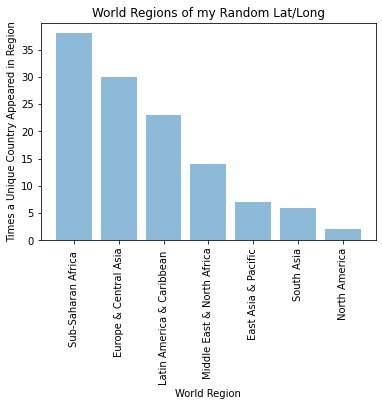

In [149]:
#Here is how many times each unique country aligned to a specific region of the world
plt.bar(region_df.index, region_df["World Region"], alpha=0.5, align="center")
plt.title("World Regions of my Random Lat/Long")
plt.xlabel("World Region")
plt.ylabel("Times a Unique Country Appeared in Region")
plt.xticks(rotation="90")

### Back to the homework, plotting requirements
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

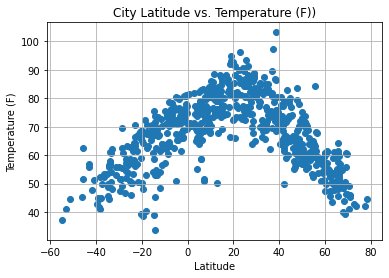

In [12]:
#Plotting Temp v Lat
x_axis = city_results_df['Lat']
y_axis = city_results_df['Max Temp']

fig = plt.scatter(x_axis, y_axis)
plt.title('City Latitude vs. Temperature (F))')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.savefig('Outputs/temperature_vs_latitude.png')

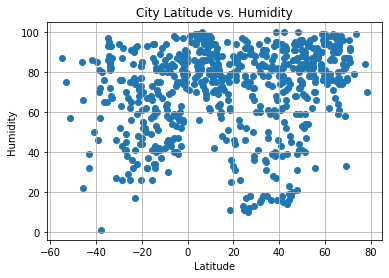

In [13]:
#Plotting Humidity v Lat
x_axis = city_results_df['Lat']
y_axis = city_results_df['Humidity']

fig = plt.scatter(x_axis, y_axis)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig('Outputs/humidity_vs_latitude.png')

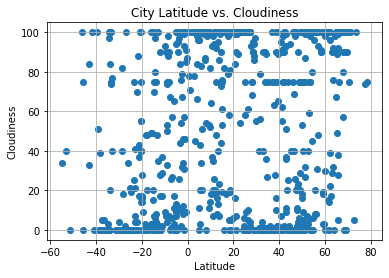

In [14]:
#Plotting cloudiness v Lat
x_axis = city_results_df['Lat']
y_axis = city_results_df['Cloudiness']

fig = plt.scatter(x_axis, y_axis)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig('Outputs/cloudiness_vs_latitude.png')

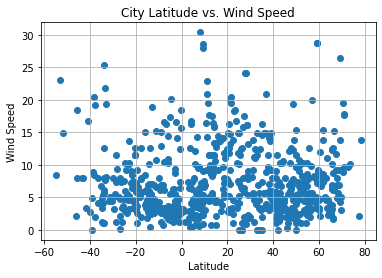

In [15]:
#Plotting wind speed v Lat
x_axis = city_results_df['Lat']
y_axis = city_results_df['Wind Speed']

fig = plt.scatter(x_axis, y_axis)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig('Outputs/wind_speed_vs_latitude.png')

### Linear Regression Plotting Requirements
* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [18]:
#isolate my data into different hemispheres
northern = city_results_df.loc[city_results_df['Lat'] >= 0]
southern = city_results_df.loc[city_results_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4803641146892041


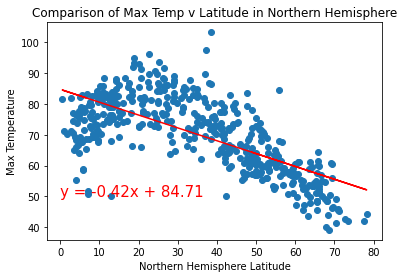

<Figure size 432x288 with 0 Axes>

In [19]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = northern["Lat"]
y_values = northern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Max Temperature')
plt.title("Comparison of Max Temp v Latitude in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Outputs/temp_v_lat_northern.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5197150943014057


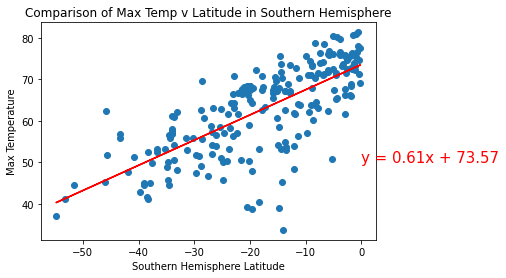

<Figure size 432x288 with 0 Axes>

In [20]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = southern["Lat"]
y_values = southern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Max Temperature')
plt.title("Comparison of Max Temp v Latitude in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Outputs/temp_v_lat_southern.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0005414164055262061


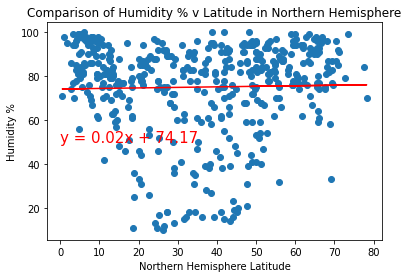

<Figure size 432x288 with 0 Axes>

In [21]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = northern["Lat"]
y_values = northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Humidity %')
plt.title("Comparison of Humidity % v Latitude in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Outputs/humidity_v_lat_northern.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0071145532778696926


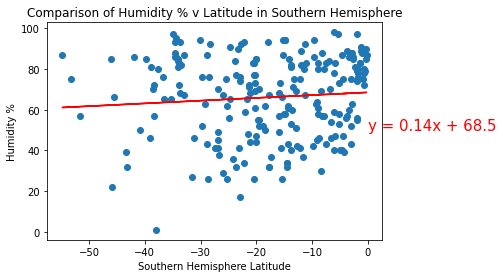

<Figure size 432x288 with 0 Axes>

In [22]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = southern["Lat"]
y_values = southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity %')
plt.title("Comparison of Humidity % v Latitude in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Outputs/humidity_v_lat_southern.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007164467067357703


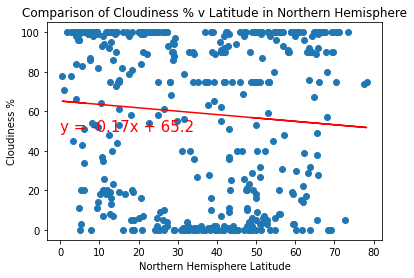

<Figure size 432x288 with 0 Axes>

In [23]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = northern["Lat"]
y_values = northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Cloudiness %')
plt.title("Comparison of Cloudiness % v Latitude in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Outputs/cloudiness_v_lat_northern.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03586208517504263


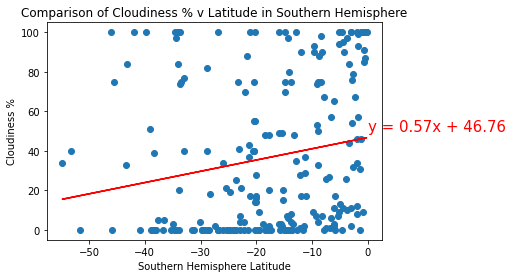

<Figure size 432x288 with 0 Axes>

In [24]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = southern["Lat"]
y_values = southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness %')
plt.title("Comparison of Cloudiness % v Latitude in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Outputs/cloudiness_v_lat_southern.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0033813541458886085


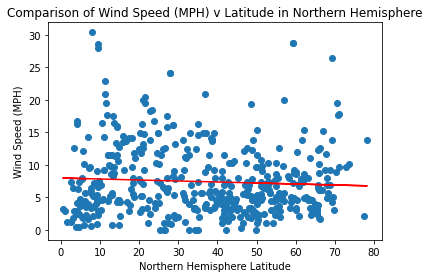

<Figure size 432x288 with 0 Axes>

In [25]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = northern["Lat"]
y_values = northern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Comparison of Wind Speed (MPH) v Latitude in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Outputs/wind_speed_v_lat_northern.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03395695933217159


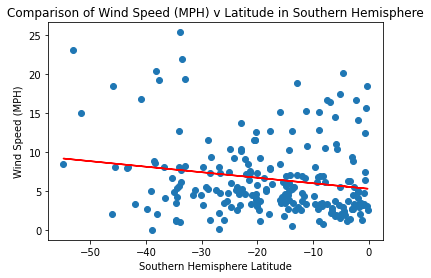

<Figure size 432x288 with 0 Axes>

In [26]:
#creating the linear regression with the values, the formula, and some charting flair
x_values = southern["Lat"]
y_values = southern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Comparison of Wind Speed (MPH) v Latitude in Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Outputs/wind_speed_v_lat_southern.png')